In [27]:
import keras
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.io import loadmat
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import confusion_matrix
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
%matplotlib inline

In [28]:
# Using TensorFlow backend.
# Set random state

np.random.seed(20)

# Load the data

train_raw = loadmat('../input/svhndataset/train_32x32.mat')
test_raw = loadmat('../input/svhndataset/test_32x32.mat')

In [29]:
# Load images and labels

train_images = np.array(train_raw['X'])
test_images = np.array(test_raw['X'])

train_labels = train_raw['y']
test_labels = test_raw['y']

# Check the shape of the data

print(train_images.shape)
print(test_images.shape)

(32, 32, 3, 73257)
(32, 32, 3, 26032)


In [30]:
# Fix the axes of the images

train_images = np.moveaxis(train_images, -1, 0)
test_images = np.moveaxis(test_images, -1, 0)

print(train_images.shape)
print(test_images.shape)


(73257, 32, 32, 3)
(26032, 32, 32, 3)


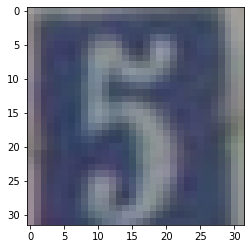

Label:  [5]


In [31]:
# Plot a random image and its label

plt.imshow(train_images[13529])
plt.show()

print('Label: ', train_labels[13529])


In [32]:
# Convert train and test images into 'float64' type
train_images = train_images.astype('float64')
test_images = test_images.astype('float64')


# Convert train and test labels into 'int64' type
y_train = train_labels.astype('int64')
y_test = test_labels.astype('int64')


In [33]:
# Normalize the images data

print('Min: {}, Max: {}'.format(train_images.min(), train_images.max()))

train_images /= train_images.mean()
test_images /= test_images.mean()

Min: 0.0, Max: 255.0


In [34]:
X = train_images.reshape((-1,32*32,3))[:,:,1]
Y = y_train

X.shape, Y.shape

((73257, 1024), (73257, 1))

In [47]:
X_train, X_val, y_train, y_val = train_test_split(X, Y,
                                                  test_size=0.15, random_state=22)
X_train.shape, X_val.shape, y_train.shape,y_val.shape

((25500, 1024), (4500, 1024), (25500, 1), (4500, 1))

In [48]:
X = X_train[:30000]
Y = y_train[:30000]
X.shape,Y.shape

((25500, 1024), (25500, 1))

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC

clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X,Y)

import pickle

filename = 'finalized_model_new.sav'
pickle.dump(clf, open(filename, 'wb'))

In [49]:
import pickle

filename = 'finalized_model.sav'
pickle.dump(clf, open(filename, 'wb'))

In [50]:
import pickle
filename = '../input/svm-svhm-trained-model/finalized_model_new.sav'
loaded_model = pickle.load(open(filename, 'rb')) 
clf = loaded_model

In [51]:
y_pred = clf.predict(X_val[500:1500])

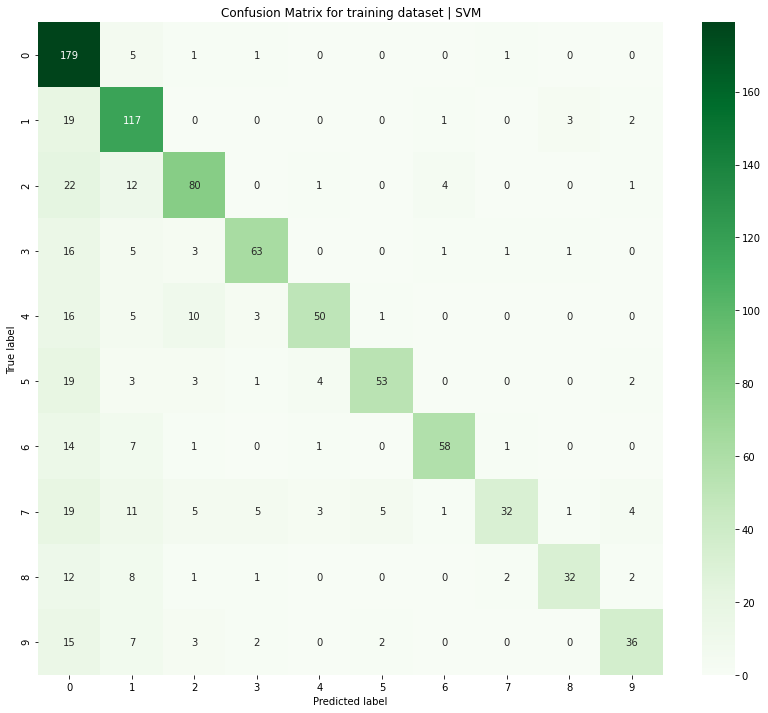

In [68]:
# Plot the confusion matrix

classes = np.array([1,  2,  3,  4,  5,  6,  7,  8,  9,10])
matrix = confusion_matrix(y_val[500:1500], y_pred, labels=classes)

fig, ax = plt.subplots(figsize=(14, 12))
sns.heatmap(matrix, annot=True, cmap='Greens', fmt='d', ax=ax)
plt.title('Confusion Matrix for training dataset | SVM')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [71]:
from sklearn.metrics import classification_report ,confusion_matrix
print('=================SVM Classification Report=================')
print()
print(classification_report(y_val[500:1500],y_pred,classes))

=================SVM Classification Report=================

              precision    recall  f1-score   support

           1       0.54      0.96      0.69       187
           2       0.65      0.82      0.73       142
           3       0.75      0.67      0.70       120
           4       0.83      0.70      0.76        90
           5       0.85      0.59      0.69        85
           6       0.87      0.62      0.73        85
           7       0.89      0.71      0.79        82
           8       0.86      0.37      0.52        86
           9       0.86      0.55      0.67        58
          10       0.77      0.55      0.64        65

    accuracy                           0.70      1000
   macro avg       0.79      0.65      0.69      1000
weighted avg       0.75      0.70      0.70      1000



# KNN

In [54]:
X = X_train
Y = y_train
X.shape,Y.shape

((25500, 1024), (25500, 1))

In [55]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X, Y)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [56]:
y_pred_knn = knn.predict(X_val)

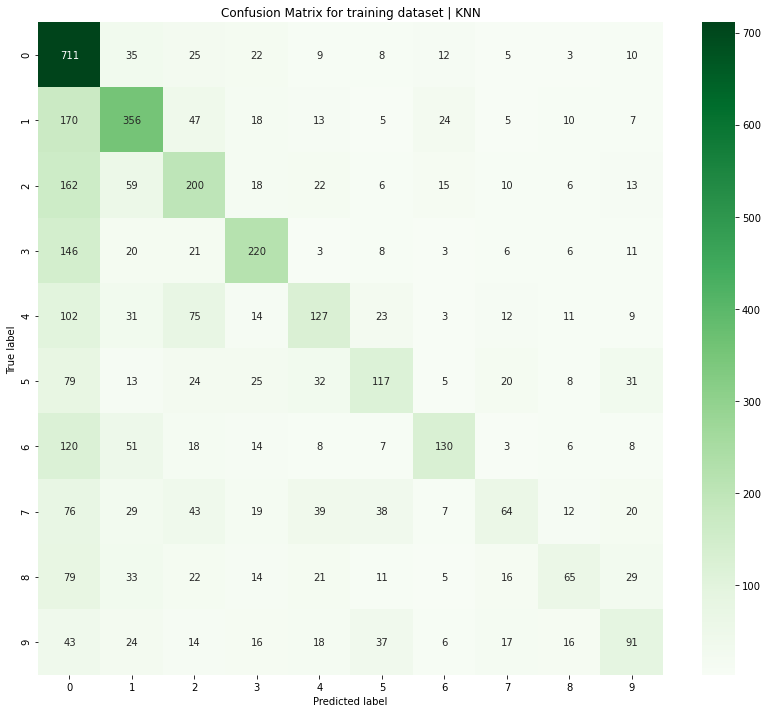

In [65]:
# Plot the confusion matrix

classes = np.array([1,  2,  3,  4,  5,  6,  7,  8,  9, 10])
matrix = confusion_matrix(y_val, y_pred_knn, labels=classes)

fig, ax = plt.subplots(figsize=(14, 12))
sns.heatmap(matrix, annot=True, cmap='Greens', fmt='d', ax=ax)
plt.title('Confusion Matrix for training dataset | KNN')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [72]:
from sklearn.metrics import classification_report ,confusion_matrix
print('=================KNN Classification Report=================')
print()
print(classification_report(y_val,y_pred_knn,classes))

=================KNN Classification Report=================

              precision    recall  f1-score   support

           1       0.42      0.85      0.56       840
           2       0.55      0.54      0.55       655
           3       0.41      0.39      0.40       511
           4       0.58      0.50      0.53       444
           5       0.43      0.31      0.36       407
           6       0.45      0.33      0.38       354
           7       0.62      0.36      0.45       365
           8       0.41      0.18      0.25       347
           9       0.45      0.22      0.30       295
          10       0.40      0.32      0.36       282

    accuracy                           0.46      4500
   macro avg       0.47      0.40      0.41      4500
weighted avg       0.47      0.46      0.44      4500



# MNIST

In [73]:
import pandas as pd

df_test = pd.read_csv('../input/mnist-in-csv/mnist_test.csv')
df_test.head(5)

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [74]:
an = np.array(df_test)
data = an[:,1:]
idx = (28*28,1*28,2*28,3*28,4*28,5*28,6*28,7*28,8*28,9*28,10*28,11*28,12*28,13*28,14*28,15*28,16*28,17*28,18*28,19*28,20*28,21*28,22*28,23*28,24*28,25*28,26*28,27*28,
      28*28,1*28,2*28,3*28,4*28,5*28,6*28,7*28,8*28,9*28,10*28,11*28,12*28,13*28,14*28,15*28,16*28,17*28,18*28,19*28,20*28,21*28,22*28,23*28,24*28,25*28,26*28,27*28,
      28*28,1*28,2*28,3*28,4*28,5*28,6*28,7*28,8*28,9*28,10*28,11*28,12*28,13*28,14*28,15*28,16*28,17*28,18*28,19*28,20*28,21*28,22*28,23*28,24*28,25*28,26*28,27*28,
      28*28,1*28,2*28,3*28,4*28,5*28,6*28,7*28,8*28,9*28,10*28,11*28,12*28,13*28,14*28,15*28,16*28,17*28,18*28,19*28,20*28,21*28,22*28,23*28,24*28,25*28,26*28,27*28)
p = np.insert(data, idx, 0, axis=1)
f = np.concatenate((p,np.zeros((10000,4*32))),axis =1)
rgb_data = np.dstack((f,np.zeros((f.shape)),np.zeros((f.shape)))) 
rgb_data = rgb_data.reshape((10000,32,32,3))
y_test_mnist = an[:,0]

In [75]:
images_mnist = f/f.mean()

In [76]:
mnist_pred = clf.predict(images_mnist[500:1500])

In [79]:
knn_pred_mnist = knn.predict(images_mnist[500:1500])

In [80]:
classes = [0,1,2,3,4,5,6,7,8,9]

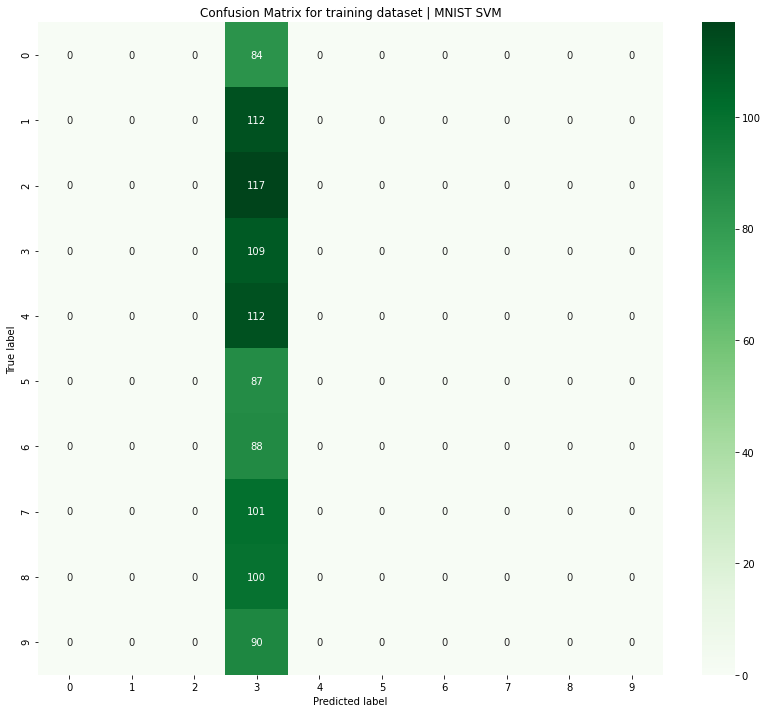

In [81]:
matrix = confusion_matrix(y_test_mnist[500:1500], mnist_pred, labels=classes)

fig, ax = plt.subplots(figsize=(14, 12))
sns.heatmap(matrix, annot=True, cmap='Greens', fmt='d', ax=ax)
plt.title('Confusion Matrix for training dataset | MNIST SVM')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [ ]:
matrix = confusion_matrix(y_test_mnist[500:1500], knn_pred_mnist, labels=classes)

fig, ax = plt.subplots(figsize=(14, 12))
sns.heatmap(matrix, annot=True, cmap='Greens', fmt='d', ax=ax)
plt.title('Confusion Matrix for training dataset | MNIST SVM')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [87]:
from sklearn.metrics import classification_report ,confusion_matrix
print('=================SVM Classification Report(MNIST)=================')
print()
print(classification_report(y_test_mnist[500:1500],mnist_pred,classes))

=================SVM Classification Report(MNIST)=================

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       112
           2       0.00      0.00      0.00       117
           3       0.11      1.00      0.20       109
           4       0.00      0.00      0.00       112
           5       0.00      0.00      0.00        87
           6       0.00      0.00      0.00        88
           7       0.00      0.00      0.00       101
           8       0.00      0.00      0.00       100
           9       0.00      0.00      0.00        90
           0       0.00      0.00      0.00        84

    accuracy                           0.11      1000
   macro avg       0.01      0.10      0.02      1000
weighted avg       0.01      0.11      0.02      1000



In [88]:
from sklearn.metrics import classification_report ,confusion_matrix
print('=================KNN Classification Report(MNIST)=================')
print()
print(classification_report(y_test_mnist[500:1500],knn_pred_mnist,classes))

=================KNN Classification Report(MNIST)=================

              precision    recall  f1-score   support

           1       0.46      0.74      0.57       112
           2       0.31      0.18      0.23       117
           3       0.70      0.15      0.24       109
           4       0.12      0.23      0.16       112
           5       0.38      0.14      0.20        87
           6       0.22      0.40      0.29        88
           7       0.20      0.39      0.27       101
           8       0.34      0.26      0.30       100
           9       0.14      0.06      0.08        90
           0       0.00      0.00      0.00        84

   micro avg       0.27      0.26      0.27      1000
   macro avg       0.29      0.25      0.23      1000
weighted avg       0.30      0.26      0.24      1000

